<a href="https://colab.research.google.com/github/Adhira-Deogade/pytorch-learnings/blob/main/model_evaluation_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
# Learn to plot the data
# Download training and test data. This is already split for us.
# Let's split the test data into validation and test dataset
# We need validation dataset for evaluating the performance of the model
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:06<00:00, 3812690.77it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 208450.65it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:03<00:00, 1419546.19it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 22609714.13it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
type(test_data)

torchvision.datasets.mnist.FashionMNIST

In [4]:
len(test_data)

10000

In [5]:

from sklearn.model_selection import train_test_split

In [6]:
training_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
len(training_data)

60000

In [8]:
# First element of training data
len(training_data[0])

2

In [9]:
# X element of training data
len(training_data[0][0])

1

In [10]:
training_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [11]:
# Length of X element of training data
# Expected 28x28
len(training_data[0][0][0])

28

In [12]:
# y element of training data
training_data[0][1]

9

In [13]:
# Length of X element of training data
# Expected 28x28
len(training_data[0][0][0][1])

28

In [14]:
# Here is an example of how to load the Fashion-MNIST dataset from TorchVision.
# Fashion-MNIST is a dataset of Zalando’s article images consisting
# of 60,000 training examples and 10,000 test examples.
# Each example comprises a 28×28 grayscale image
# and an associated label from one of 10 classes.

In [15]:
# Iterating and Visualizing the Dataset
# We can index Datasets manually like a
# list: training_data[index].
# We use matplotlib to visualize some samples in our training data.
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [16]:
import matplotlib.pyplot as plt

In [17]:
cols, rows = 3, 3

In [18]:
batch_size = 64
val_data, test_data = train_test_split(test_data)

# Create data loaders
train_dataloader = DataLoader(training_data, batch_size=batch_size)
val_dataloader = DataLoader(val_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for  X, y in train_dataloader:
  print(f"Shape of X [N, C, H, W]: {X.shape}")
  print(f"Shape of y: {y.shape}, {y.dtype}")
  break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]), torch.int64


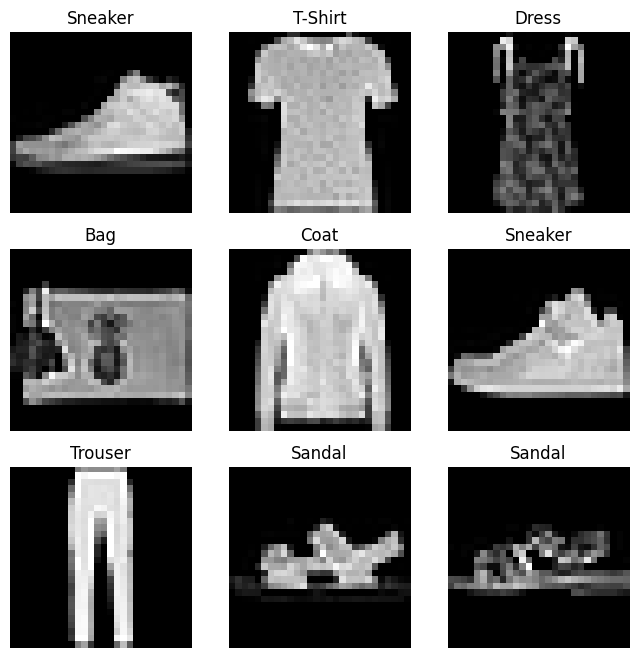

In [19]:
figure = plt.figure(figsize=(8, 8))
for i in range(1, cols * rows +1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [20]:
len(val_data), len(test_data)

(7500, 2500)

In [21]:
# Create a list of models
model_1 = nn.Sequential(
    nn.Linear(28*28, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 10),
)

model_2 = nn.Sequential(
    nn.Linear(28*28, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 10),
)

# model_3 = nn.Sequential(
#     nn.Linear(28*28, 512),
#     nn.ReLU(),
#     nn.Linear(512, 512),
#     nn.ReLU(),
#     nn.Linear(512, 256),
#     nn.ReLU(),
#     nn.Linear(256, 256),
#     nn.ReLU(),
#     nn.Linear(256, 16),
#     nn.ReLU(),
#     nn.Linear(16, 32),
#     nn.ReLU(),
#     nn.Linear(32, 10),
# )

# model_4 = nn.Sequential(
#     nn.Linear(28*28, 512),
#     nn.ReLU(),
#     nn.Linear(512, 256),
#     nn.ReLU(),
#     nn.Linear(256, 128),
#     nn.ReLU(),
#     nn.Linear(128, 64),
#     nn.ReLU(),
#     nn.Linear(64, 32),
#     nn.ReLU(),
#     nn.Linear(32, 16),
#     nn.ReLU(),
#     nn.Linear(16, 10),
# )

model_list = [model_1, model_2]
print(model_list)

[Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=10, bias=True)
), Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=256, bias=True)
  (5): ReLU()
  (6): Linear(in_features=256, out_features=256, bias=True)
  (7): ReLU()
  (8): Linear(in_features=256, out_features=10, bias=True)
)]


In [22]:
# Get cpu, gpu or mps device for training
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using device {device}")

Using device cuda


In [23]:
# Define model
class NeuralNetwork(nn.Module):
  def __init__(self, sequence):
    super().__init__()
    self.flatten = nn.Flatten()
    self.softmax_relu_stack = sequence


  def forward(self, x):
    x = self.flatten(x)
    logits = self.softmax_relu_stack(x)
    return logits


In [24]:

# Optimizing the model parameters
# To train a model we need
# 1. a loss function
# 2. an optimizer

# loss_fn = nn.CrossEntropyLoss()
# # optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
# print(f"Loss function = {loss_fn}")
# print(f"Optimizer = {optimizer}")

In [25]:
# network_1 = NeuralNetwork(model_1).to(device)
# network_2 = NeuralNetwork(model_2).to(device)
# network_3 = NeuralNetwork(model_3).to(device)
# print(network_1, network_2, network_3)

In [26]:
softmax_fn = torch.nn.Softmax()

In [27]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  print(f"Size = {size}")
  print(f"Length of dataloader = {len(dataloader)}")
  model.train()
  # print(f"model = {model}")
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    # print(f"Length of X = {len(X)}; Length of y = {len(y)}")

    # Compute prediction error
    pred = model(X)
    # pred = softmax_fn(pred)

    # print(f"pred = {pred}")
    loss = loss_fn(pred, y)
    # print(f"loss = {loss}")

    # Backpropagation
    loss.backward()
    # print(f"loss = {loss}")
    optimizer.step()
    optimizer.zero_grad()

    if batch%100 == 0:
      loss, current = loss.item(), (batch+1)*len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/ {size:>5d}]")

In [28]:
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      # pred = softmax_fn(pred)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct) :>0.1f}%, Avg loss: {test_loss:>8f}\n")

In [31]:
x = 0
for test_model in model_list:
  network = NeuralNetwork(test_model).to(device)
  print(network)
  # Optimizing the model parameters
  # To train a model we need -
  # 1. a loss function
  # 2. an optimizer

  loss_fn = nn.CrossEntropyLoss()
  # optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
  optimizer = torch.optim.Adam(network.parameters(), lr=1e-3)
  print(f"Loss function = {loss_fn}")
  print(f"Optimizer = {optimizer}")
  # The training process is conducted over several epochs/ iterations.
  # During each epoch, the model learns parameters to make better predictions.
  # We print the model's accuracy and loss at each epoch; we'd like to see
  # the accuracty increase and loss decreasing with every epoch

  epochs = 5
  for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------")
    train(train_dataloader, network, loss_fn, optimizer)
    test(val_dataloader, network, loss_fn)
  torch.save(network.state_dict(), f"model{x}.pth")
  print(f"Saved PyTorch Model Steat to model{x}.pth")
  x+=1
  print("Done!")

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (softmax_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
Loss function = CrossEntropyLoss()
Optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Epoch 1
-------------------
Size = 60000
Length of dataloader = 938
loss: 3.747924 [   64/ 60000]
loss: 0.313999 [ 6464/ 60000]
loss: 0.237580 [12864/ 60000]
loss: 0.274156 [19264/ 60000]
loss: 0.359813 [25664/ 60000]
loss: 0.323221 [32064/ 60000]
loss: 0.229674 [38464/ 60000]
loss: 0.341838 [44864/ 60000]
loss: 0.314023 [51264/ 60000]
loss: 0.326766 [57664/ 60000]
Test Error: 
 Accuracy: 87.2%, Avg loss: 0.3

In [32]:
x = 1
test_model = model_list[x]
network = NeuralNetwork(test_model).to(device)
print(network)
network.load_state_dict(torch.load(f"model{x}.pth", weights_only=True))
epochs = 5
for t in range(epochs):
  print(f"Epoch {t+1}\n-------------------")
  test(val_dataloader, network, loss_fn)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (softmax_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): ReLU()
    (8): Linear(in_features=256, out_features=10, bias=True)
  )
)
Epoch 1
-------------------
Test Error: 
 Accuracy: 88.3%, Avg loss: 0.349925

Epoch 2
-------------------
Test Error: 
 Accuracy: 88.3%, Avg loss: 0.349925

Epoch 3
-------------------
Test Error: 
 Accuracy: 88.3%, Avg loss: 0.349925

Epoch 4
-------------------
Test Error: 
 Accuracy: 88.3%, Avg loss: 0.349925

Epoch 5
-------------------
Test Error: 
 Accuracy: 88.3%, Avg loss: 0.349925

